In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as se
import matplotlib.pyplot as plt


In [2]:
# Importing our dataset which consists of 10000+ sentences of 17 different languages.
data = pd.read_csv("Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
# Separating Dependent and Independent features.

X = data["Text"]
y = data["Language"]


In [5]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
(unique, counts) = np.unique(y, return_counts=True)
f = np.asarray((unique, counts)).T
f

array([[   0,  536],
       [   1,  428],
       [   2,  546],
       [   3, 1385],
       [   4, 1014],
       [   5,  470],
       [   6,  365],
       [   7,   63],
       [   8,  698],
       [   9,  369],
       [  10,  594],
       [  11,  739],
       [  12,  692],
       [  13,  819],
       [  14,  676],
       [  15,  469],
       [  16,  474]], dtype=int64)

In [7]:
# creating a list for appending the preprocessed text
data_list = []

for text in X:
        # removing the symbols and numbers
        text = re.sub(r'[!@#$(),\n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

C:\Users\user\AppData\Local\Temp/ipykernel_18016/554851814.py:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [11]:
x_train.shape

(8269, 39404)

In [12]:
x_test.shape

(2068, 39404)

In [13]:
# Model Training and Prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(x_test)

In [15]:
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [16]:
ac

0.9792069632495164

In [17]:
y_pred[:30]

array([13,  5,  3, 13, 13, 14,  3,  6,  5,  3, 16,  3,  9, 12, 13, 14, 14,
        1, 13,  0,  2, 10, 10, 12,  0,  2, 12,  6, 10, 15])

In [18]:
y_test[:30]

array([13,  5,  3, 13, 13, 14,  3,  6,  5,  3, 16, 15,  9, 12, 13, 14, 14,
        1, 13,  0,  2, 10, 10, 12,  0,  2, 12,  6, 10, 15])

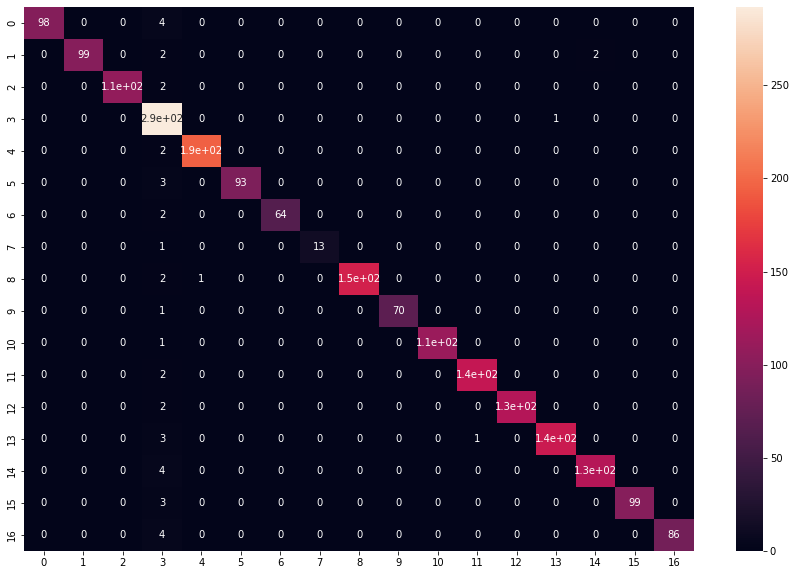

In [19]:
# Plotting our confusion matrix
plt.figure(figsize=(15,10))
se.heatmap(cm, annot = True)
plt.show()

In [20]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [21]:
predict("# Wat betekent dat woord?")

The langauge is in Dutch


In [22]:
# Wat betekent dat woord?
# Hola! Soy un hombre pobre que
# वाक्य शब्दों का वह समूह होता है जिसका अर्थ पूर्णतः समझ में आ जाए